# Run cell mapping: CellTrek

We follow the original GitHub tutorial

# Imports

In [1]:
global_path <- './cell-cell-communication/' ## Path to the github downloaded repository

In [2]:
.libPaths('/home/epareja/miniconda3/envs/r4-cellchat/lib/R/library')
options(stringsAsFactors = F)
library("CellTrek")
library("dplyr")
library("Seurat")
library("ConsensusClusterPlus")
library(pheatmap)
library(viridis)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr::first’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘MASS::select’ by ‘dplyr::select’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘data.table::between’ by ‘dplyr::between’ when loading ‘CellTrek’”
Warning message:
“replacing previous import ‘dplyr::union’ by ‘igraph::union’ when loading ‘CellTrek’

# Load data (downloaded from CellTrek GitHub)

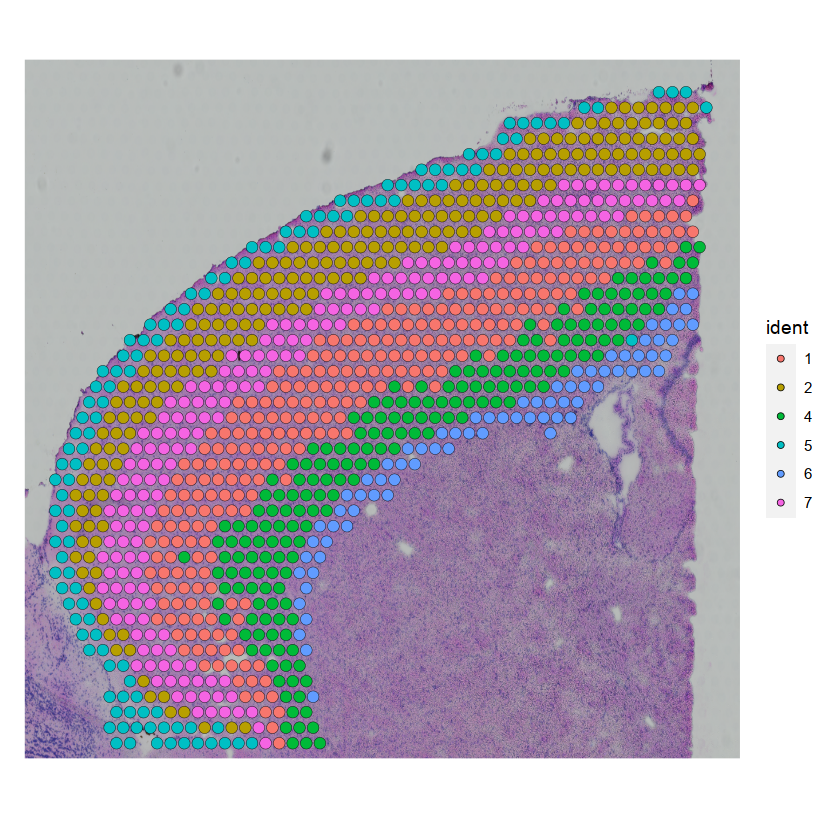

In [3]:
st_path <- sprintf("%sData/Brain/brain_st_cortex.rds", global_path)
sc_path <- sprintf("%sData/Brain/brain_sc.rds", global_path)
brain_st_cortex <- readRDS(st_path)
brain_sc <- readRDS(sc_path)

## Rename the cells/spots with syntactically valid names
brain_st_cortex <- RenameCells(brain_st_cortex, new.names=make.names(Cells(brain_st_cortex)))
brain_sc <- RenameCells(brain_sc, new.names=make.names(Cells(brain_sc)))

## Visualize the ST data
SpatialDimPlot(brain_st_cortex)

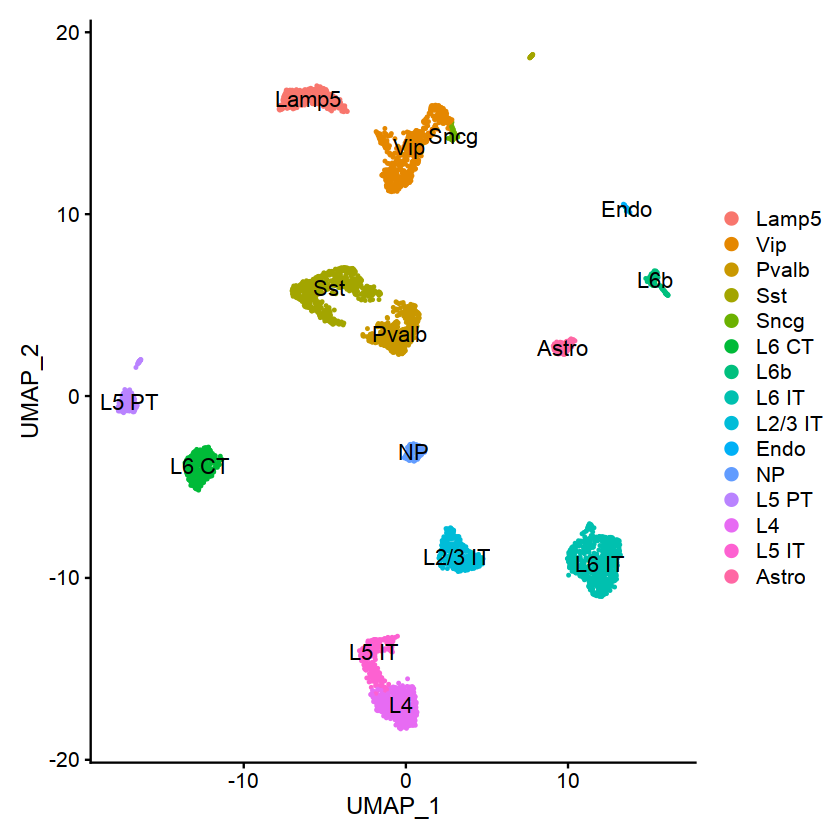

In [4]:
## Visualize the scRNA-seq data
DimPlot(brain_sc, label = T, label.size = 4.5)

# Run CellTrek

Finding transfer anchors... 
Using 2000 features for integration... 


Warning message in RunCCA.Seurat(object1 = reference, object2 = query, features = features, :
“Running CCA on different assays”
Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 3730 anchors

Filtering anchors

	Retained 2660 anchors



Data transfering... 


Finding integration vectors

Finding integration vector weights

Transfering 2000 features onto reference data



Creating new Seurat object... 
Scaling -> PCA -> UMAP... 


Centering and scaling data matrix

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 2 features requested have zero variance (running reduction without them): Inmt, Clec4a3”
PC_ 1 
Positive:  Slco1c1, S1pr1, Mfsd2a, S100a16, Slc38a3, Epas1, Gstm1, Apoe, Pon2, Serpinh1 
	   Fam107a, Sparc, Myo10, Glul, Id1, Fcgrt, Rgcc, Csrp1, Id3, Fermt2 
	   Vim, Cst3, S100a1, Ramp2, Mt2, Mfge8, Eogt, Slc2a1, Ccdc141, Ifitm3 
Negative:  Rtn1, Snap25, Snhg11, Ndrg4, Vsnl1, Basp1, Ywhah, Uchl1, Meg3, Prkar1b 
	   Stmn2, Atp1b1, Stmn1, Chn1, Olfm1, Sncb, Atp1a3, Mef2c, Chgb, Pak1 
	   Prkcb, Ncald, Nrsn1, Scn1b, Ppp3ca, St8sia3, Syn2, Pgm2l1, Syt13, Hpca 
PC_ 2 
Positive:  Nrgn, Baiap2, Slc17a7, Ier5, Nrn1, Ly6e, Arpp19, Stx1a, Sv2b, Gm11549 
	   Cd34, Ctxn1, Foxp1, Itpka, Ptk2b, 1110008P14Rik, Rasgrp1, Fmnl1, Arpp21, Slc39a10 
	   Kcnv1, Lingo1, Atp1a1, Neurod6, 3110035E14Rik, Rtn4r, Dusp14, Ppp3ca, Neurod2, Igfbp6 
Negative:  Slc6a1, Gad1, Gad2, Dner, Sl

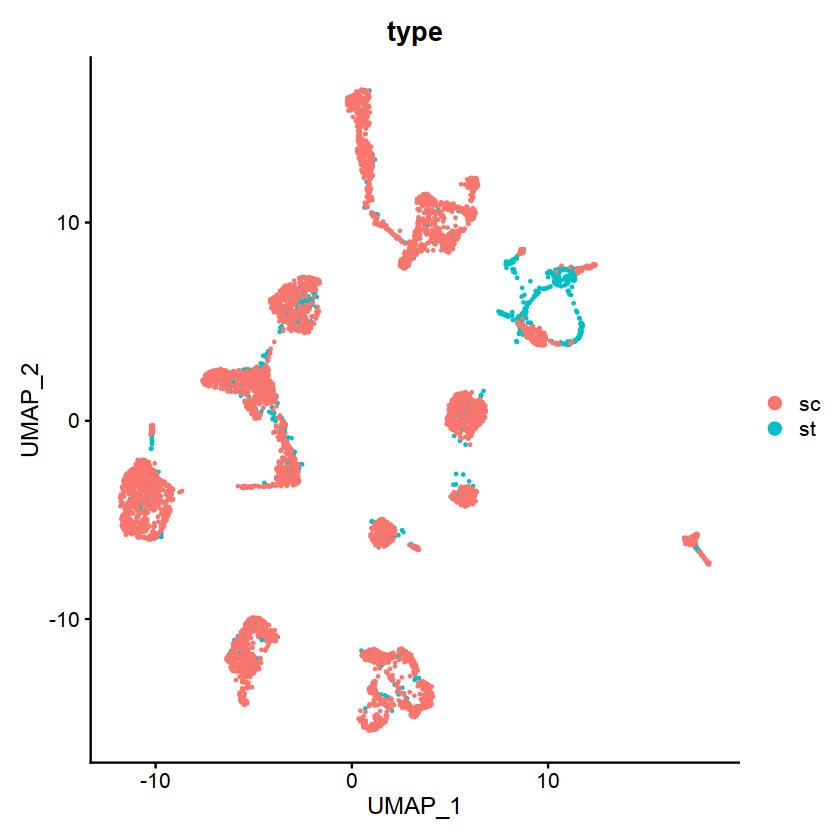

In [5]:
### co-embedding  
brain_traint <- CellTrek::traint(st_data=brain_st_cortex, sc_data=brain_sc, sc_assay='RNA', cell_names='cell_type')


## We can check the co-embedding result to see if there is overlap between these two data modalities
DimPlot(brain_traint, group.by = "type") 


# Assign cells to spatial locations

In [6]:
brain_celltrek <- CellTrek::celltrek(st_sc_int=brain_traint, int_assay='traint', sc_data=brain_sc, sc_assay = 'RNA', 
                                   reduction='pca', intp=T, intp_pnt=5000, intp_lin=F, nPCs=30, ntree=1000, 
                                   dist_thresh=0.55, top_spot=1, spot_n=5, repel_r=20, repel_iter=20, keep_model=T)$celltrek

### top_spot to change the number of times a cell can be mapped to a spot 
     
brain_celltrek$cell_type <- factor(brain_celltrek$cell_type, levels=sort(unique(brain_celltrek$cell_type)))
file_path_result <- sprintf("%sResults/Brain/CellTrek/meta_cellcharting.csv", global_path)
# write.csv(breast_celltrek@meta.data, file_path_result, row.names=TRUE)

Distance between spots is: 138 
Interpolating...
Random Forest training... 
Random Forest prediction...  
Making distance matrix... 
Making graph... 
Pruning graph...


Joining with `by = join_by(Var1, Var2, value, val_rsc, Var1_type, Var2_type)`


Spatial Charting SC data...
Repelling points...
Creating Seurat Object... 
sc data...

Joining with `by = join_by(id_raw, id_new)`
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek_raw to celltrekraw_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to celltrekraw_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from celltrek to celltrek_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to celltrek_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca to pca_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca_”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap to umap_”
Warning message:
“All keys should b

# Explore cell annotation 

In [ ]:
CellTrek::celltrek_vis(brain_celltrek@meta.data %>% dplyr::select(coord_x, coord_y, cell_type:id_new),
                       brain_celltrek@images$anterior1@image, brain_celltrek@images$anterior1@scale.factors$lowres)

# SCoexp analysis: spatial-wighted gene co-expression analysis within the cell type of interest

We use this methodology to select cells which expression depends on the spatial location

## Extract L5 IT cells from the CellTrek result

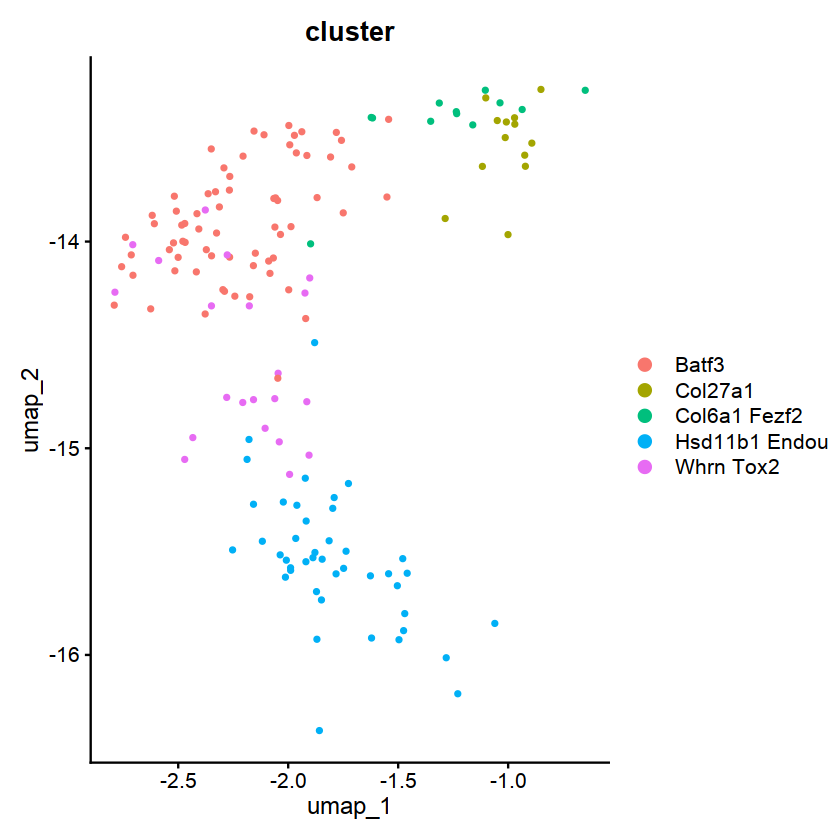

In [11]:

brain_celltrek_l5 <- subset(brain_celltrek, subset=cell_type=='L5 IT')
brain_celltrek_l5@assays$RNA@scale.data <- matrix(NA, 1, 1)
# You are looking for the L5 IT VISp and replace it with an empty string. You delete the celltype information and only keep the gene annotation
brain_celltrek_l5$cluster <- gsub('L5 IT VISp', '', brain_celltrek_l5$cluster) 
# We are representing the different subtypes inside the L5 IT cell. They are defined depending on marker genes. 
DimPlot(brain_celltrek_l5, group.by = 'cluster')

## Select top variable genes and exclude mitochondrial, ribosomal or high-zero

In [12]:
brain_celltrek_l5 <- FindVariableFeatures(brain_celltrek_l5) 
vst_df <- brain_celltrek_l5@assays$RNA@meta.features %>% data.frame %>% mutate(id=rownames(.))
nz_test <- apply(as.matrix(brain_celltrek_l5[['RNA']]@data), 1, function(x) mean(x!=0)*100)
hz_gene <- names(nz_test)[nz_test<20]
mt_gene <- grep('^Mt-', rownames(brain_celltrek_l5), value=T)
rp_gene <- grep('^Rpl|^Rps', rownames(brain_celltrek_l5), value=T)
vst_df <- vst_df %>% dplyr::filter(!(id %in% c(mt_gene, rp_gene, hz_gene))) %>% arrange(., -vst.variance.standardized)
feature_temp <- vst_df$id[1:2000]

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
“selection.method set to 'vst' but count slot is empty; will use data slot instead”


## Run SCoexp

In [13]:
### We use scoexp to do the spatial-weighted gene co-expression analysis.
brain_celltrek_l5_scoexp_res_cc <- CellTrek::scoexp(celltrek_inp=brain_celltrek_l5, assay='RNA', approach='cc', gene_select = feature_temp, sigm=140, avg_cor_min=.4, zero_cutoff=3, min_gen=40, max_gen=400)


Centering and scaling data matrix



Calculating spatial-weighted cross-correlation...
Consensus clustering...


end fraction

clustered

clustered

clustered

clustered

clustered

clustered

clustered



Gene module detecting...
1  2  3  4  5  6  7  8  

## Visualization of the co-expression modules using heatmap

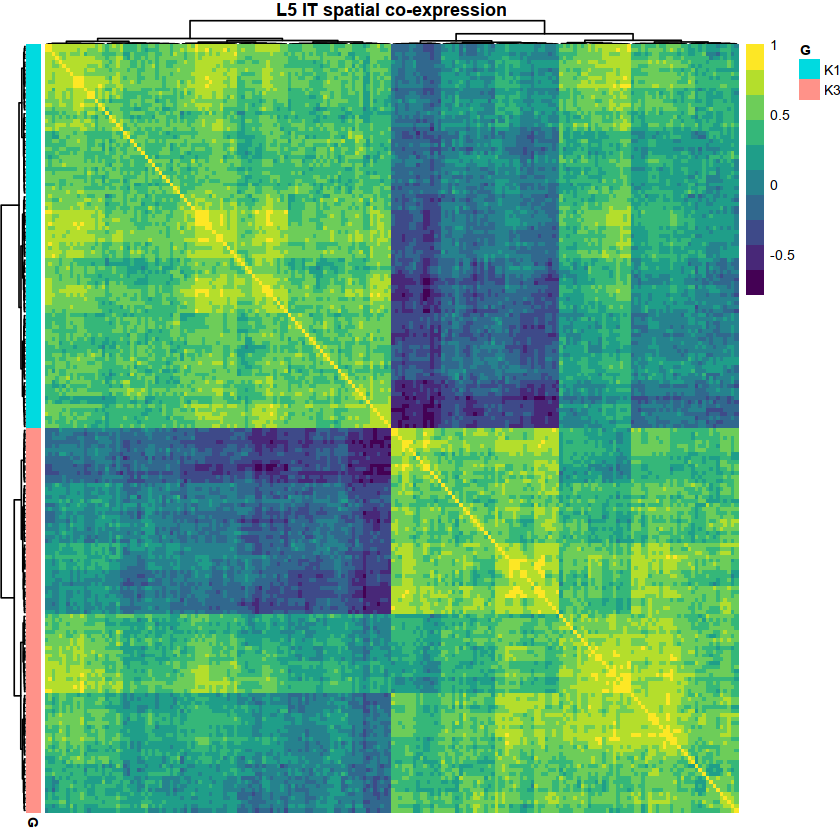

In [20]:
brain_celltrek_l5_k <- rbind(data.frame(gene=c(brain_celltrek_l5_scoexp_res_cc$gs[[1]]), G='K1'), 
                           data.frame(gene=c(brain_celltrek_l5_scoexp_res_cc$gs[[2]]), G='K3')) %>% 
                           magrittr::set_rownames(.$gene) %>% dplyr::select(-1)


pheatmap::pheatmap(brain_celltrek_l5_scoexp_res_cc$wcor[rownames(brain_celltrek_l5_k), rownames(brain_celltrek_l5_k)], 
                   clustering_method='ward.D2', annotation_row=brain_celltrek_l5_k, show_rownames=F, show_colnames=F, 
                   treeheight_row=10, treeheight_col=10, annotation_legend = T, fontsize=8,
                   color=viridis(10), main='L5 IT spatial co-expression')

## Calculate module score for each of the cell

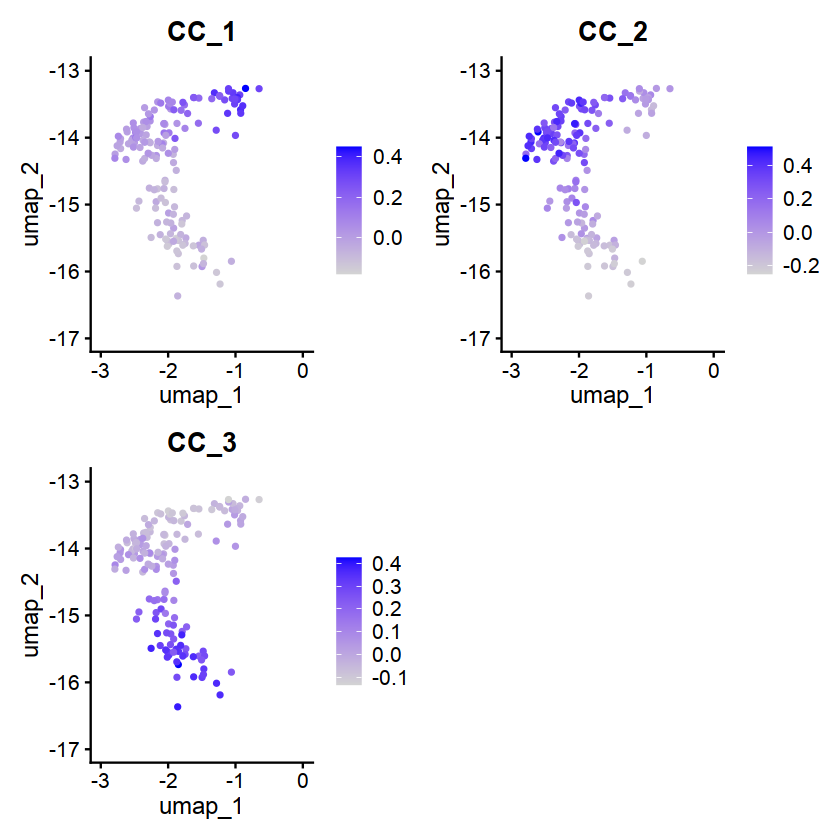

In [16]:
brain_celltrek_l5 <- AddModuleScore(brain_celltrek_l5, features=brain_celltrek_l5_scoexp_res_cc$gs, name='CC_', nbin=10, ctrl=50, seed=42)
## First we look into the coexpression module based on the scRNA-seq embedding
FeaturePlot(brain_celltrek_l5, grep('CC_', colnames(brain_celltrek_l5@meta.data), value=T))

## Explore module scores at spatial level

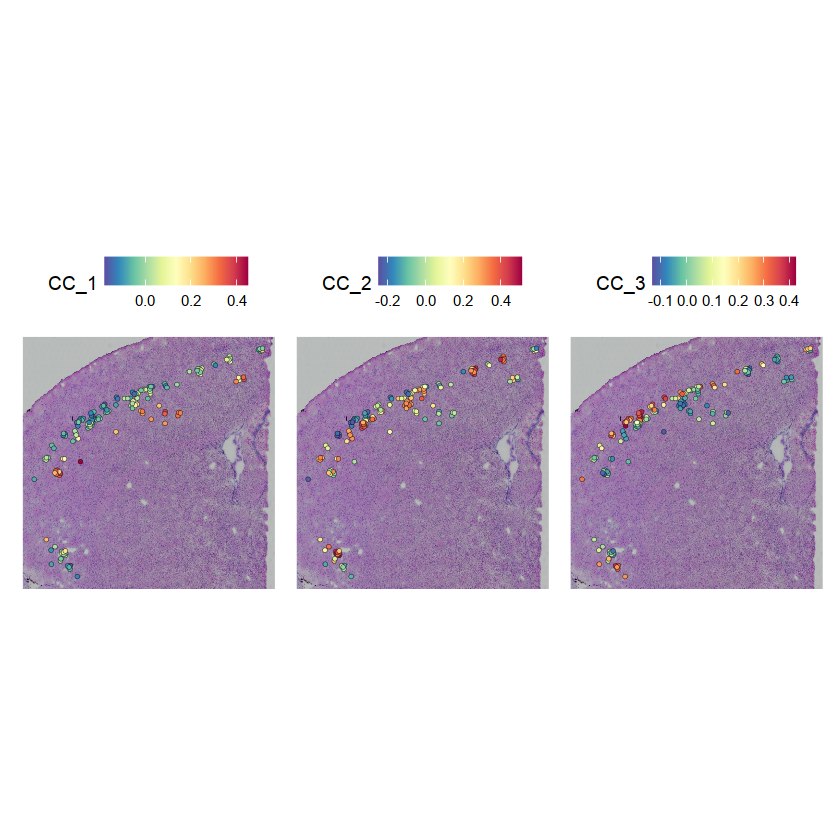

In [18]:
SpatialFeaturePlot(brain_celltrek_l5, grep('CC_', colnames(brain_celltrek_l5@meta.data), value=T))


We detected 3 different modules, and they correspond to cells that are in the inner part of the layer, the middle and the outer part. We can use this division for the rest of the analysis

In [ ]:
file_path_result <- sprintf("%sResults/Brain/CellTrek/meta_cellcharting_l5modules.csv", global_path)
# write.csv(brain_celltrek_l5@meta.data, file_path_result, row.names=TRUE)


In [ ]:
## Save the data in a format that can be used in python ## 

# st_coods_path <- sprintf("%sData/Brain/stdata_coods.csv", global_path)
# write.csv(brain_st_cortex@images$anterior@coordinates, st_coods_path, row.names=TRUE)
# library(dior)
# st_path <- sprintf("%sData/Brain/stdata.h5", global_path)
# write_h5(brain_st_cortex, st_path, object.type = 'seurat', save.graphs = T, assay.name = 'spatial')
# sc_path <- sprintf("%sData/Brain/scdata.h5", global_path)
# write_h5(brain_sc, sc_path, object.type = 'seurat', save.graphs = T)